# **Seoul Bike Sharing Demand Prediction**
**About the dataset**

This dataset is taken from UCI Machine learning Repository. http://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

**INFORMATION:**

In many urban cities, the introduction of rental bikes has revolutionized mobility and brought enhanced comfort to commuters. The availability and accessibility of rental bikes at the right time play a pivotal role in reducing waiting times, offering a convenient mode of transportation for residents and visitors alike. One of the key elements in achieving this stability is the accurate prediction of bike counts required at each hour.

Analyzing dataset and building predictive models allows city planners and bike-sharing service providers to anticipate demand fluctuations, adjust their operations, and ultimately contribute to a sustainable and reliable rental bike system in urban areas.

**APPLICATION:**

Data-Driven Decision Making: The dataset provides valuable insights into how weather conditions, time of day, and other factors influence bike rental patterns. This information can inform data-driven decisions for optimizing operations.
*These insights are relevant not only for bike-sharing services but also for ride-sharing giants like Uber and regional players like Rapido in India, where urban mobility is a growing concern.*

**DATA DISCRIPTION:**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**ATTRIBUTE INFORMATION:**

1. Date : year-month-day

2. Rented Bike count - Count of bikes rented at each hour

3. Hour - Hour of he day

4. Temperature-Temperature in Celsius

5. Humidity - %

6. Windspeed - m/s

7. Visibility - 10m

8. Dew point temperature - Celsius

9. Solar radiation - MJ/m2

10. Rainfall - mm

11. Snowfall - cm

12. Seasons - Winter, Spring, Summer, Autumn

13. Holiday - Holiday/No holiday

14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)




In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
palette = sns.color_palette("Set2")

**Read the data set**

In [3]:
#Load the dataset into a Pandas DataFrame
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
df.shape

(8760, 14)

In [7]:
# Study the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.select_dtypes(include=[np.number]).head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [9]:
df.select_dtypes(include=['object']).head()

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes


There are three catogorical variables and dates can also be converted into numerical data by some transformations


In [10]:
# statistics of the numerical variables (excluding categorical variables)
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000




1.  **Average Bikes Rented are 704 and maximum 3556 are rented in one day.**
2.   **Average Temperature is 12°C.**



In [11]:
# statistics of the categorical variables
df.describe(include = 'object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465




1. **Functioning days are 8465**
2.   **Most bikes are rented in month of** **Spring**
3. **Most bikes are rented on Working days**



In [12]:
df.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_15908\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


1. Rented Bike Count (the target variable) has a **positive correlation** with the following variables:
   1. Hour: 0.410257
   2. Temperature(°C): 0.538558
   3. Dew point temperature(°C): 0.379788
   4. Solar Radiation (MJ/m2): 0.261837

 This suggests that as these variables increase, the number of rented bikes tends to increase as well.

2. Rented Bike Count has a **negative correlation** with the following variables:

   1. Humidity(%): -0.199780
   2. Rainfall(mm): -0.123074
   3. Snowfall (cm): -0.141804

 This indicates that as these variables increase, the number of rented bikes tends to decrease.

3. Hour has a **positive correlation** with:

   1. Wind speed (m/s): 0.285197

 This suggests that as the hour of the day increases, the wind speed tends to increase.

4. Temperature(°C) has a **positive correlation** with:

   1. Dew point temperature(°C): 0.912798
   2. Solar Radiation (MJ/m2): 0.353505

 This indicates that as temperature rises, dew point temperature and solar radiation tend to increase as well.

5. Humidity(%) has a **negative correlation** with:

   1. Visibility (10m): -0.543090

 As humidity increases, visibility tends to decrease.

6. Dew point temperature(°C) has a **positive correlation** with:

   1. Temperature(°C): 0.912798

 This indicates that as the dew point temperature increases, the overall temperature also tends to increase.

7. Solar Radiation (MJ/m2) has a **positive correlation** with:

   1. Hour: 0.145131

 Solar radiation tends to increase as the hour of the day progresses.

8. Rainfall(mm) and Snowfall (cm) have **weak correlations** with most variables, indicating that their influence on bike rental count is not as strong as other factors.

<Axes: >

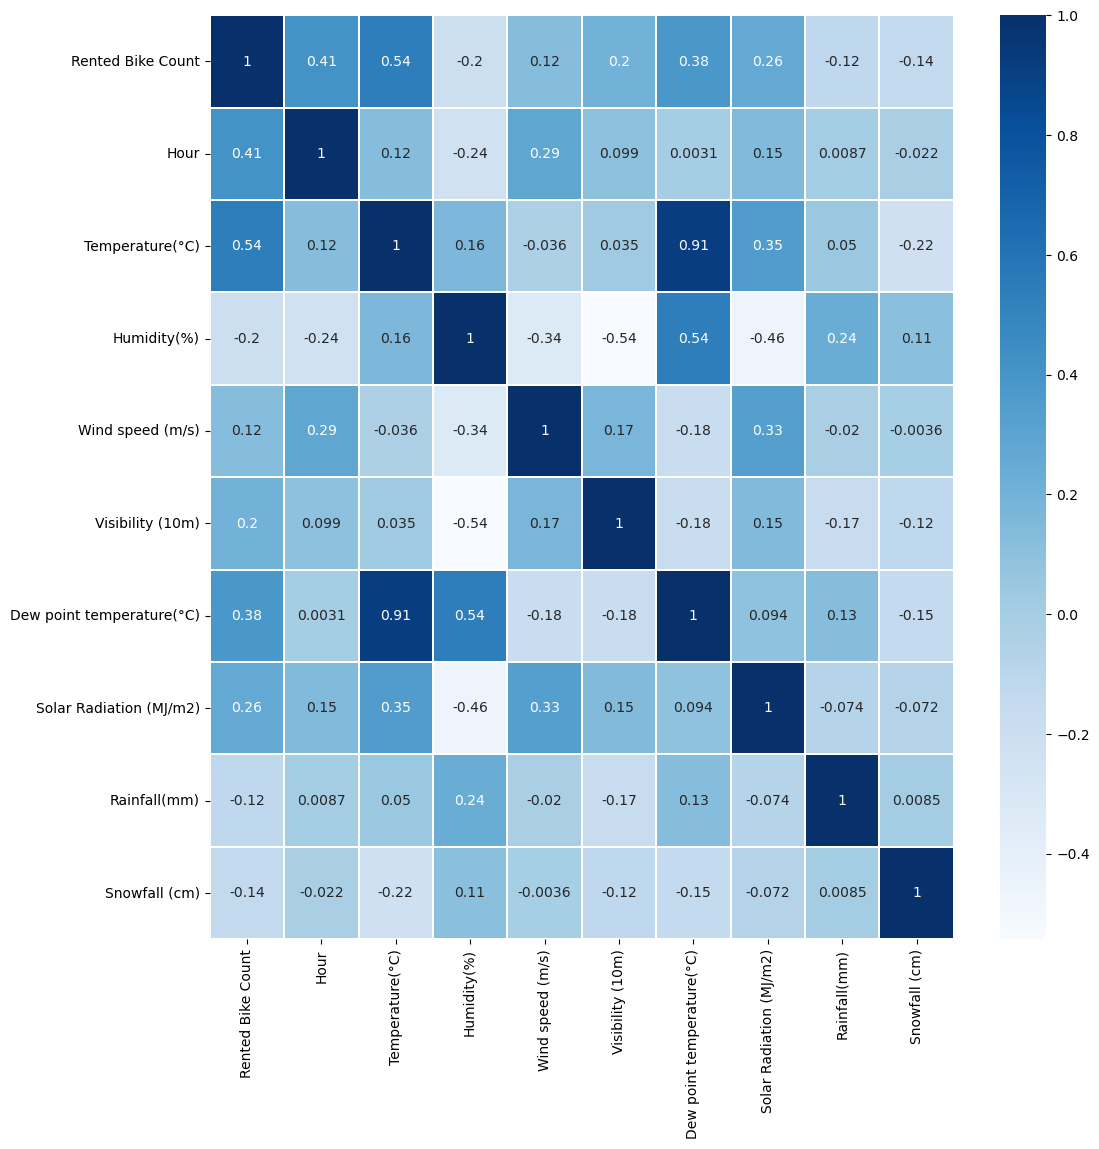

In [13]:
data_corr= df.corr(numeric_only = True)
plt.figure(figsize=(12,12))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='Blues', linewidths=0.1, annot=True, linecolor='white')



1.  There is a **high correlation (0.91)** between Temperature and Dew point temperature. So, dew point temperature variable can be droped.



In [14]:
df.drop(columns=['Dew point temperature(°C)'], inplace=True)

In [15]:
# #ploting functioning days
# plt.figure(figsize=(15,7))
# sns.set_palette("tab10")
# sns.barplot(x='Hour', y = 'Rented Bike Count', hue='Functioning Day', data = df);

In [16]:
df.groupby('Functioning Day').sum(numeric_only = True)['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


In [17]:
#Removing data of non functional days (non rented days)
df=df.drop(df[df['Functioning Day'] == 'No'].index)

In [18]:
#Due to not unsefull in Functioning Day Column, remove Functioning Day Column
df=df.drop(['Functioning Day'], axis = 1)

Converting the dd/mm/yyyy into seperate variables days, month, year

In [19]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Separate Day, Month, Year from DataFrame Column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.strftime('%A')

In [20]:
# Drop the Date column after extracting necessary information
df.drop(columns=['Date'], inplace=True)  # Use inplace=True to drop the column in-place

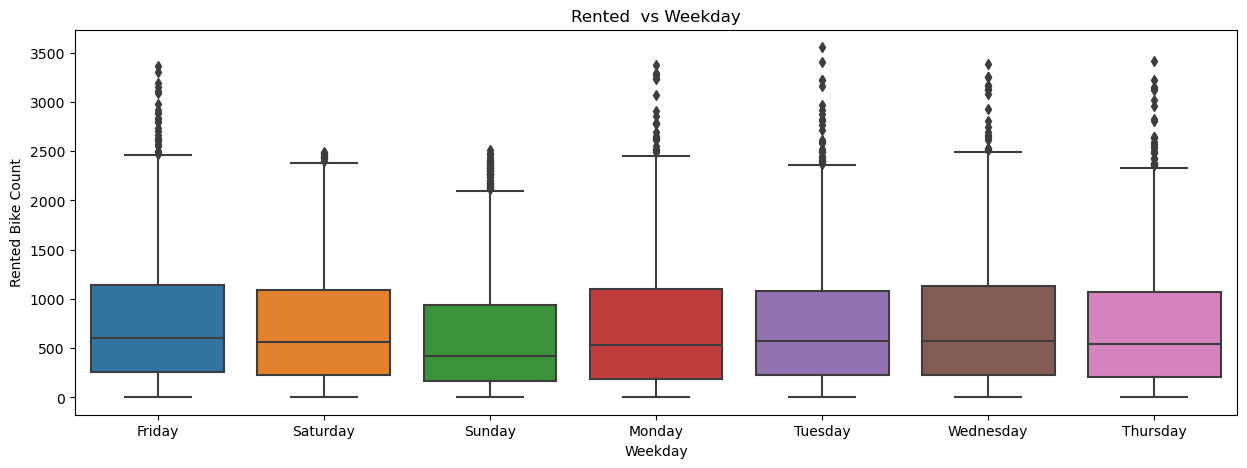

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the boxplot on the single subplot
sns.boxplot(x='Weekday', y='Rented Bike Count', data=df, ax=ax)
ax.set_title('Rented  vs Weekday')

# Show the plot
plt.show()

There is not much variation with weekdays, hence dropping it.

In [22]:
df.drop(columns=['Weekday'], inplace=True)

In [23]:
#if dtype is not Equal to object type then its a num data
numerical_features=[col for col in df.columns if df[col].dtype!='O']
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [24]:
# Seprate dataframe for Numerical feature
num_data=df[numerical_features]
num_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018


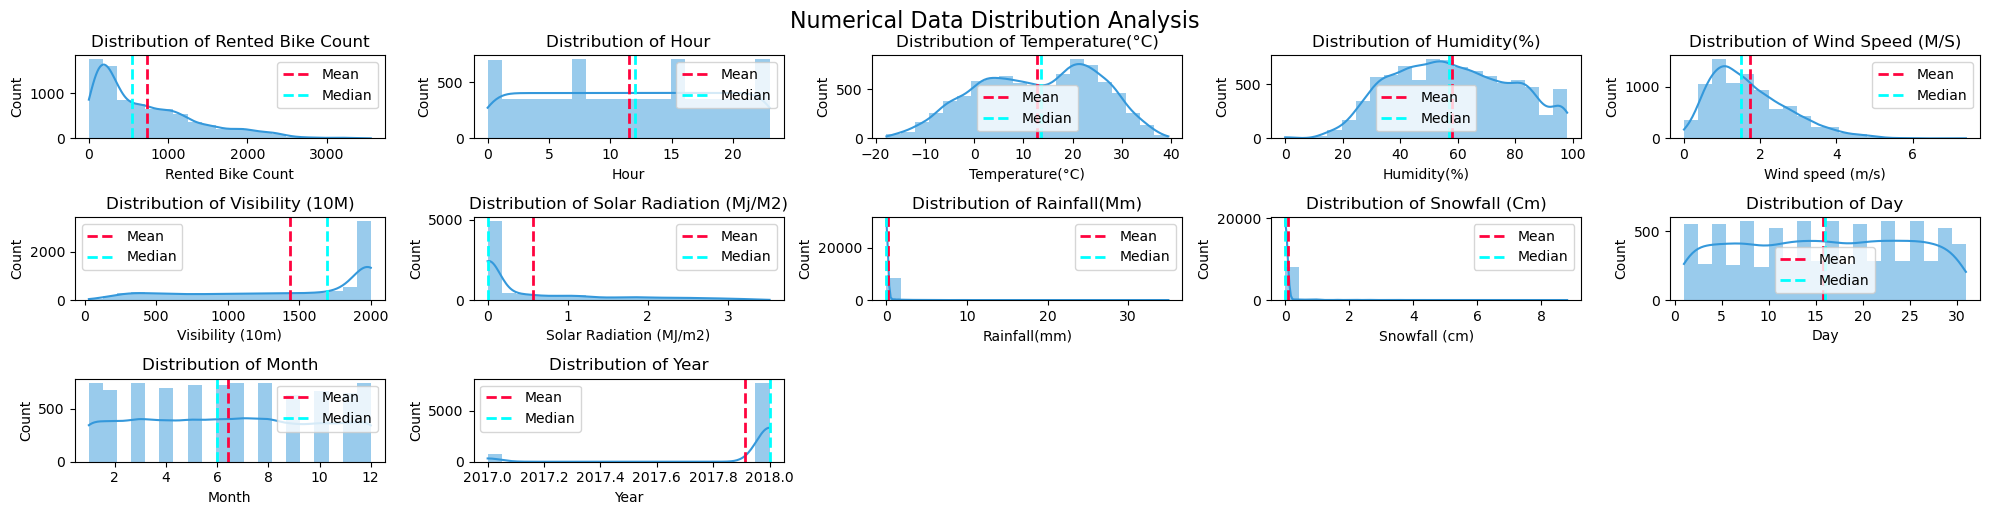

In [25]:
fig = plt.figure(figsize=(20, 5))

# Iterate through numerical features for data distribution analysis
for index, column in enumerate(numerical_features):
    plt.subplot(3, 5, index + 1)

    # Plot the distribution using Seaborn's histplot
    sns.histplot(df[column], color='#3498db', kde=True, bins=20, edgecolor='none')

    # Get the feature data
    feature = df[column]

    # Add vertical lines to indicate the mean and median
    ax = fig.gca()
    ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2, label='Mean')  # Rose-Red Color for Mean
    ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2, label='Median')  # Cyan for Median

    # Set plot title and improve layout
    plt.title(f'Distribution of {column.title()}')
    plt.legend(loc='best')  # Add a legend
    plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle("Numerical Data Distribution Analysis", fontsize=16, y=1.02)

# Show the plot
plt.show()


In [26]:
num_data.agg(['skew', 'kurtosis']).T

,skew,kurtosis
Rented Bike Count,1.139700,0.820305
Hour,-0.001261,-1.203446
Temperature(°C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378
Day,-0.018521,-1.183248




1.   Rainfall(mm) is strongly right-skewed, indicating that there are a few instances with very high rainfall values that are far from the mean.
2.   Snowfall (cm) is also right-skewed, suggesting that higher snowfall values occur more infrequently

3. Wind speed (m/s) also exhibits right-skewness, suggesting that higher wind speeds are more common


Discrete Variables Count: 4


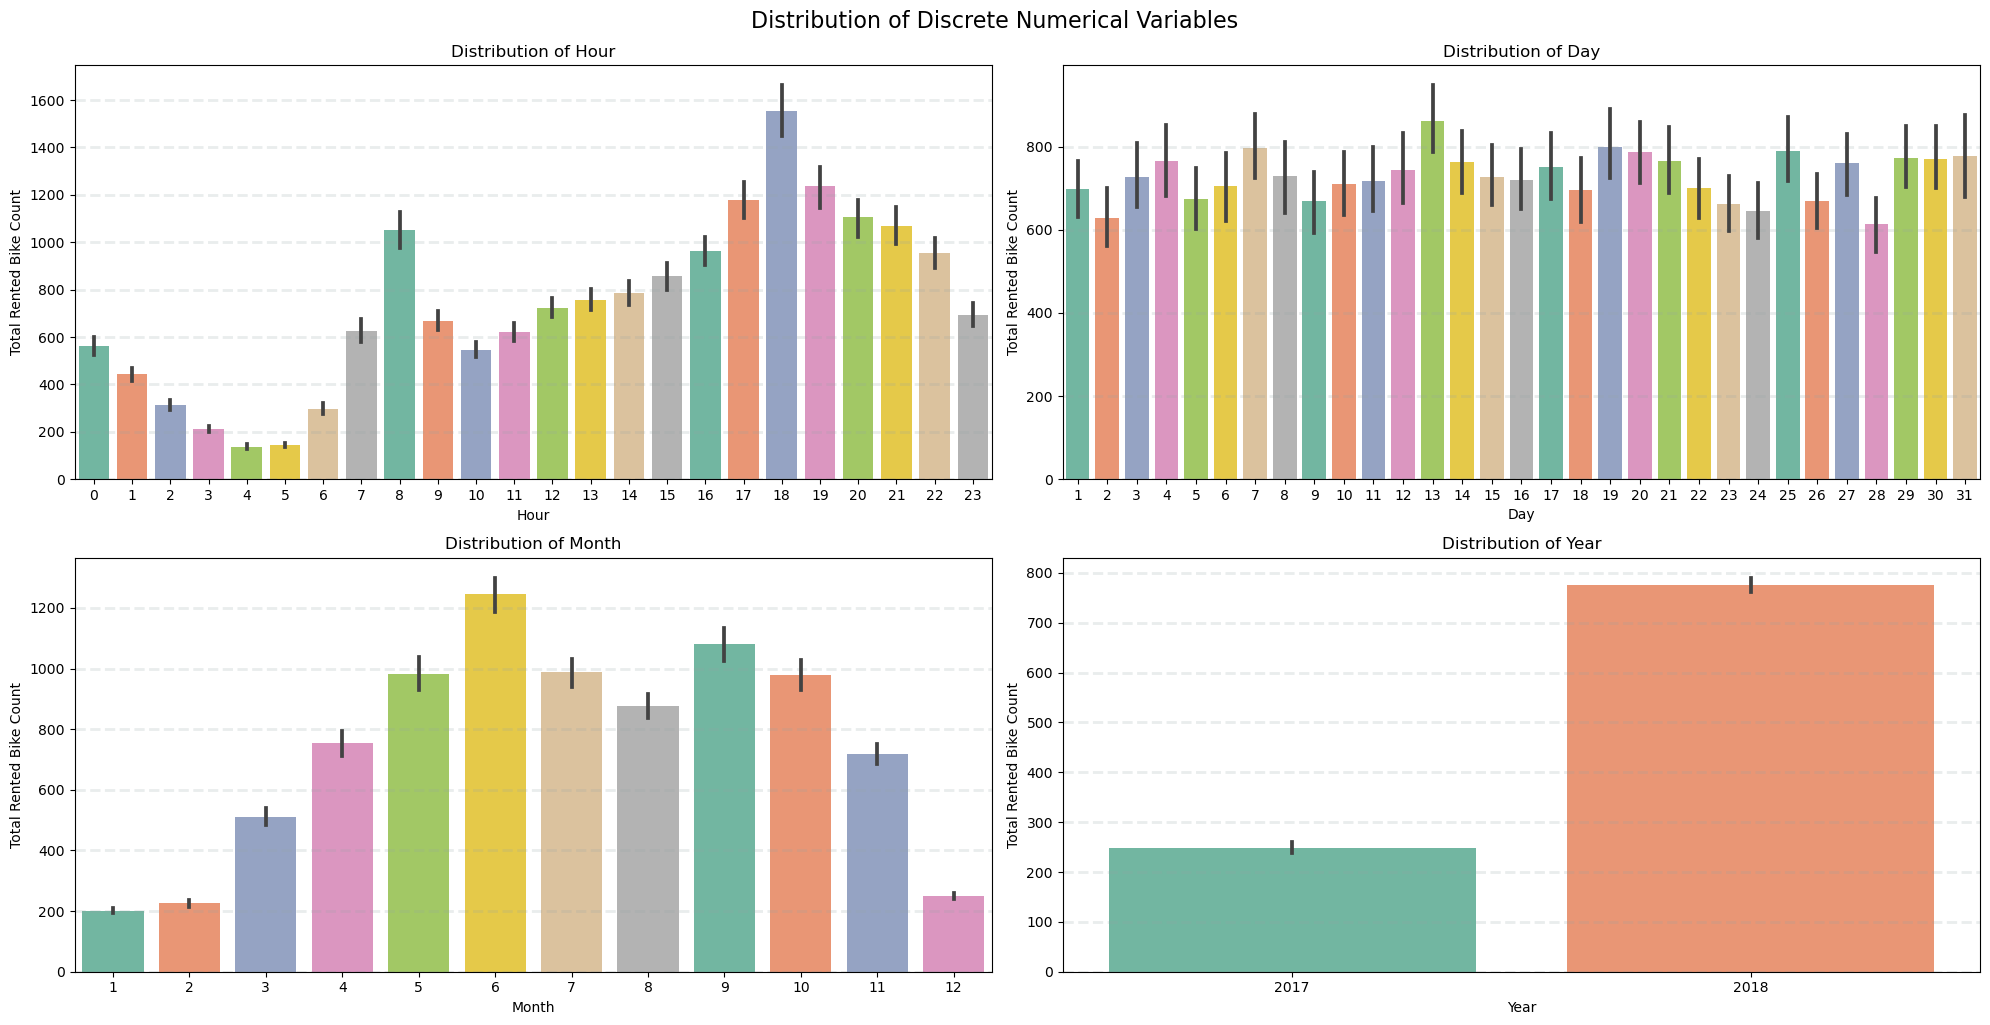

In [27]:
# Define discrete numerical features
num_discrete_value = [feature for feature in numerical_features if len(df[feature].unique()) < 32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

# Create a figure with a specific size
fig = plt.figure(figsize=(20, 10))

# Iterate through discrete numerical features for analysis
for index, column in enumerate(num_discrete_value):
    plt.subplot(2, 2, index + 1)

    # Create a copy of the dataset
    dataset = df.copy()

    # Group by the discrete feature and plot a bar chart of the total rented bike count
    sns.barplot(x=column, y='Rented Bike Count', data=dataset, palette=palette)

    # Set plot title, labels, and improve layout
    plt.title(f'Distribution of {column.title()}')
    plt.xlabel(column.title())
    plt.ylabel('Total Rented Bike Count')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)

    # Annotate the bars with count values
    for p in ax.patches:
        ax.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', size=12, rotation=90)  # Rotate count to 90 degrees for clarity

    plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle("Distribution of Discrete Numerical Variables", fontsize=16, y=1.02)

# Show the plot
plt.show()

1. Bike demand is higher in days 6 to 10 of month.
2. Bike demand is high around the evening time 5PM to 10PM.
3. Bikes are rented less in months of December, January and February.

In [28]:
#For categorical Data
categorical_features=[col for col in df.columns if df[col].dtype=='O']
categorical_features

['Seasons', 'Holiday']

In [29]:
# Seprate dataframe for Categorical feature
cat_data=df[categorical_features]

In [30]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2


In [31]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Seasons').sum(numeric_only = True)['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [32]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Holiday').sum(numeric_only= True)['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895




1.   Bikes are rented more on Working days.



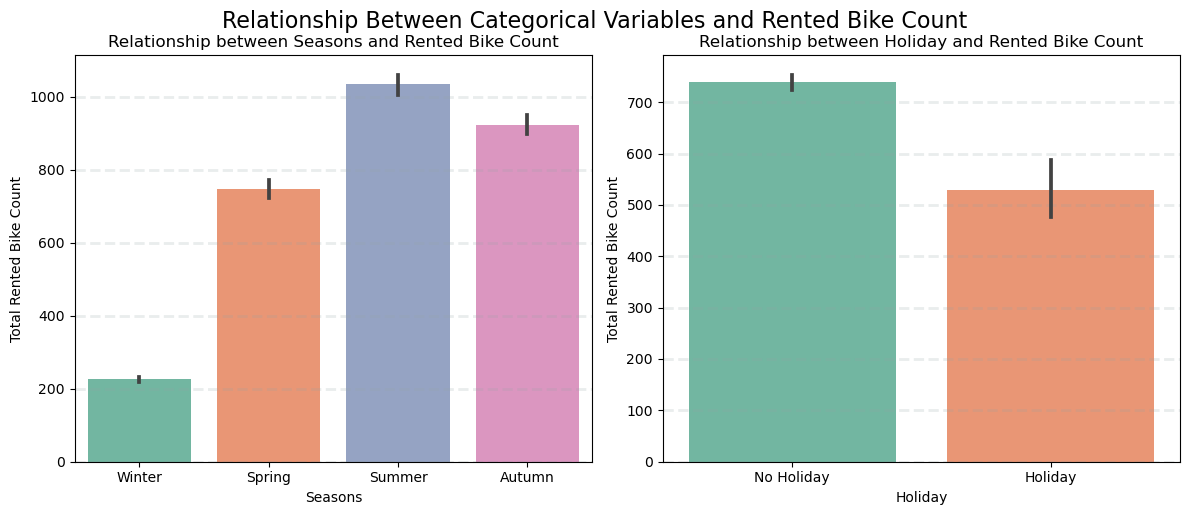

In [33]:
fig = plt.figure(figsize=(12, 5))

# Iterate through categorical features for analysis
for index, column in enumerate(categorical_features):
    plt.subplot(1, 2, index + 1)

    # Create a copy of the dataset
    dataset = df.copy()

    # Group by the categorical feature and plot a bar chart of the total rented bike count
    sns.barplot(x=column, y='Rented Bike Count', data=dataset,  palette=palette)

    # Set plot title, labels, and improve layout
    plt.title(f'Relationship between {column.title()} and Rented Bike Count')
    plt.xlabel(column.title())
    plt.ylabel('Total Rented Bike Count')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)

    # Annotate the bars with count values
    for p in ax.patches:
        ax.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', size=12, rotation=90)  # Rotate count to 90 degrees for clarity

    plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle("Relationship Between Categorical Variables and Rented Bike Count", fontsize=16, y=1.02)

# Show the plot
plt.show()

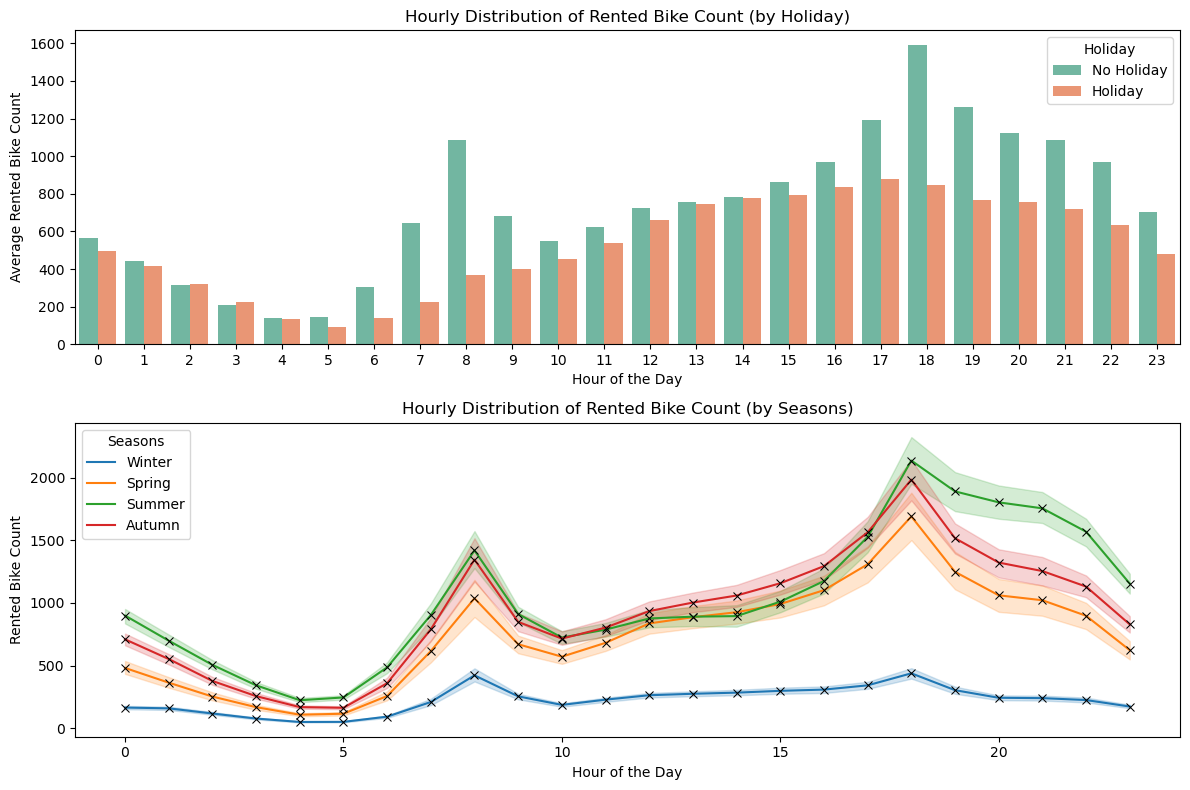

In [34]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot the barplot for Hour vs. Rented Bike Count with hue based on Holiday
sns.barplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], hue="Holiday", palette=palette, errorbar=None)
axs[0].set_xlabel("Hour of the Day")
axs[0].set_ylabel("Average Rented Bike Count")
axs[0].set_title("Hourly Distribution of Rented Bike Count (by Holiday)")
axs[0].legend(title="Holiday", loc="upper right")

# Plot the lineplot for Hour vs. Rented Bike Count with hue based on Seasons
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], hue="Seasons", marker="x", markeredgecolor="black")
axs[1].set_xlabel("Hour of the Day")
axs[1].set_ylabel("Rented Bike Count")
axs[1].set_title("Hourly Distribution of Rented Bike Count (by Seasons)")
axs[1].legend(title="Seasons")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
# Encode labels of multiple columns at ones using LabelEncoder
le_df = df.apply(LabelEncoder().fit_transform)
le_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,252,0,111,28,22,1779,0,0,0,3,1,0,11,0
1,202,1,108,29,8,1779,0,0,0,3,1,0,11,0
2,171,2,103,30,10,1779,0,0,0,3,1,0,11,0
3,105,3,101,31,9,1779,0,0,0,3,1,0,11,0
4,76,4,103,27,23,1779,0,0,0,3,1,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,990,19,205,25,26,1673,0,0,0,0,1,29,10,1
8756,754,20,197,28,23,1779,0,0,0,0,1,29,10,1
8757,685,21,189,30,3,1747,0,0,0,0,1,29,10,1
8758,703,22,184,32,10,1639,0,0,0,0,1,29,10,1


In [36]:
# # Encode labels of multiple columns at ones using LabelEncoder
# le_df = data_iqr.apply(LabelEncoder().fit_transform)
# le_df

In [37]:
# le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])
# le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

### Splitting of independent & dependent variable

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [40]:
# Assuming you already have X and y defined from your code
X = le_df.drop('Rented Bike Count', axis=1)
y = le_df['Rented Bike Count']

In [41]:
# # Apply Min-Max scaling to both input features (X) and the target variable (y)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# y = np.array(y)  # Convert the target variable to a NumPy array
# y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape and flatten the scaled target variable

# # Split the scaled data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.10, random_state=42)

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

X = le_df.drop('Rented Bike Count', axis=1)
y = le_df[['Rented Bike Count']]  # Keep y as a DataFrame with a single column

# Apply Min-Max scaling to X and y together
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(pd.concat([X, y], axis=1))

# Split the scaled data into training and testing sets
X_scaled, y_scaled = data_scaled[:, :-1], data_scaled[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.10, random_state=42)

# Converting X_train, X_test, y_train, y_test back to DataFrames if needed
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# y_train = pd.DataFrame(y_train, columns=y.columns)
# y_test = pd.DataFrame(y_test, columns=y.columns)

## Linear Regression through statsmodels

In [43]:
#adding a constant to our independent variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [44]:
# X_train.head()

In [45]:
# OLS function is the fumction for the Linear Regression
# passing the target and the independent variable to the OLS()
model =  sm.OLS(y_train, X_train)

In [46]:
# fit the data model with the given data
model = model.fit()

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     820.7
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:17:08   Log-Likelihood:                 2698.5
No. Observations:                7618   AIC:                            -5369.
Df Residuals:                    7604   BIC:                            -5272.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [48]:
# because the p-values of the following variables are greater than 0.05
# the variables are insignificant
to_drop = ['Day', 'Visibility (10m)', 'Wind speed (m/s)']
X_train_sig = X_train.drop(to_drop,axis=1)
X_test_sig = X_test.drop(to_drop,axis=1)

In [49]:
# we build model only with significant variables
model_sig = sm.OLS(y_train, X_train_sig)
# We fit the data model with the given data
model_sig = model_sig.fit()

In [50]:
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1065.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:17:09   Log-Likelihood:                 2693.4
No. Observations:                7618   AIC:                            -5365.
Df Residuals:                    7607   BIC:                            -5288.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [51]:
predictions=model_sig.predict(X_test_sig)
predictions.head()

0    0.672567
1    0.449877
2    0.595295
3    0.258891
4    0.666661
dtype: float64

In [52]:
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)

print("RMSE is", rmse)

RMSE is 0.15795990797448498


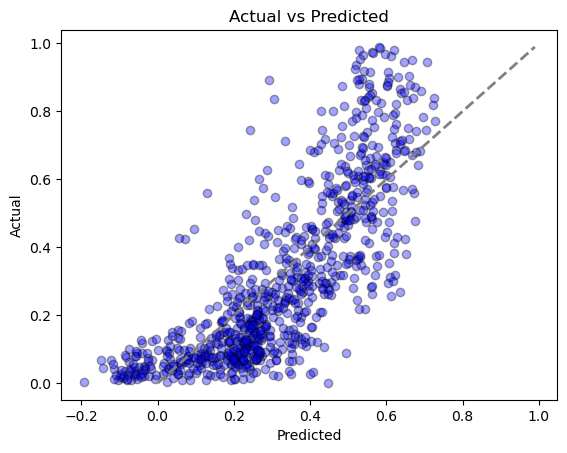

In [53]:
# plt.figure(figsize=(4,4))
plt.scatter(predictions, y_test, color='b', alpha=0.36, linewidth=1, edgecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

# Add a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.show()

In [54]:
# Assuming you have your DataFrame named df
# Calculate the IQR for each numerical column
num_data = df.select_dtypes(include=[np.number])

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

outlier = pd.DataFrame((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column Rented Bike Count are 152
Total number of Outliers in column Hour are 0
Total number of Outliers in column Temperature(°C) are 0
Total number of Outliers in column Humidity(%) are 0
Total number of Outliers in column Wind speed (m/s) are 154
Total number of Outliers in column Visibility (10m) are 0
Total number of Outliers in column Solar Radiation (MJ/m2) are 620
Total number of Outliers in column Rainfall(mm) are 516
Total number of Outliers in column Snowfall (cm) are 443
Total number of Outliers in column Day are 0
Total number of Outliers in column Month are 0
Total number of Outliers in column Year are 744


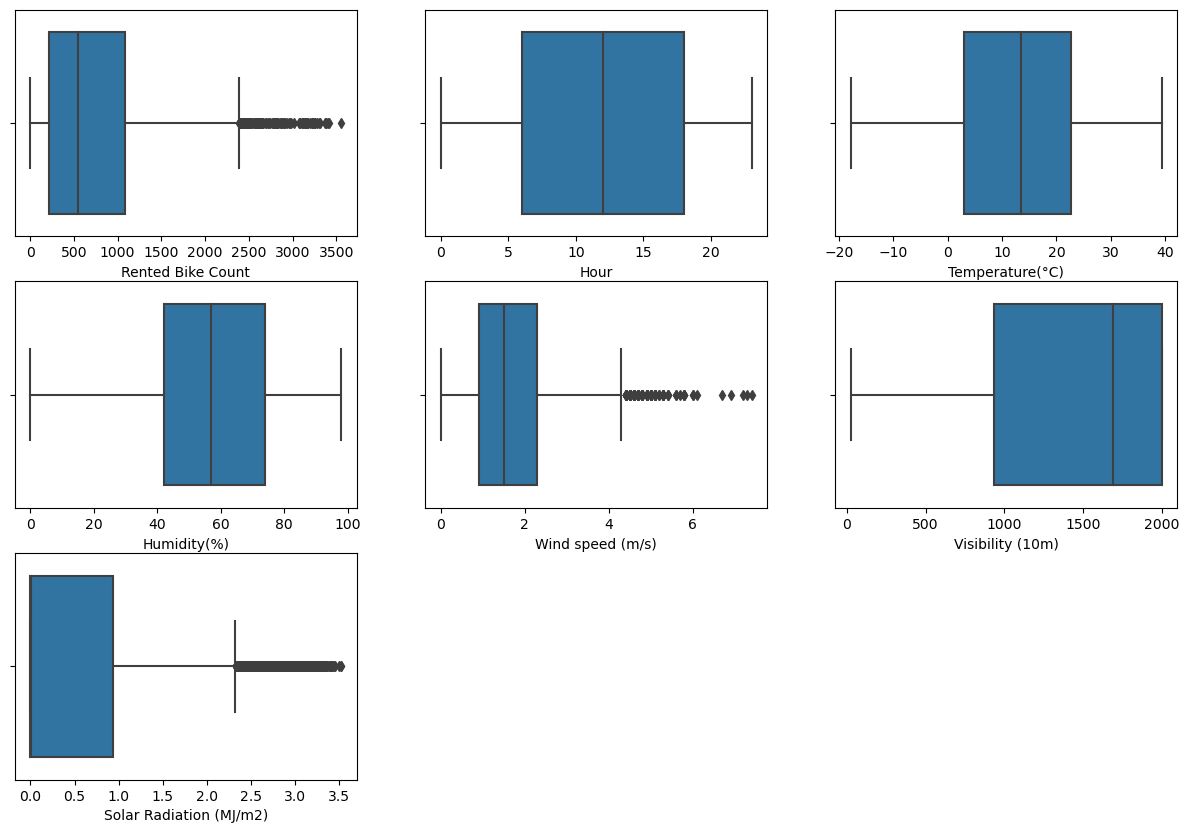

In [55]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(15, 10))
for variable, subplot in zip(num_data.columns,ax.flatten()):
    z = sns.boxplot(x = num_data[variable], orient = "h", whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

In [56]:
# Detect and remove outliers using IQR method
outliers_mask = ((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))).any(axis=1)
data_iqr = df[~outliers_mask]

# Reset the index of the cleaned DataFrame
data_iqr.reset_index(drop=True, inplace=True)

In [57]:
# Assuming you have your DataFrame named df
# Calculate the IQR for each numerical column
num_data = data_iqr.select_dtypes(include=[np.number])

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

outlier = pd.DataFrame((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column Rented Bike Count are 0
Total number of Outliers in column Hour are 0
Total number of Outliers in column Temperature(°C) are 0
Total number of Outliers in column Humidity(%) are 0
Total number of Outliers in column Wind speed (m/s) are 0
Total number of Outliers in column Visibility (10m) are 0
Total number of Outliers in column Solar Radiation (MJ/m2) are 0
Total number of Outliers in column Rainfall(mm) are 0
Total number of Outliers in column Snowfall (cm) are 0
Total number of Outliers in column Day are 0
Total number of Outliers in column Month are 0
Total number of Outliers in column Year are 0


In [58]:
#calculate the first quartile (Q1) and third quartile (Q3) for each colomn
q1 = le_df.quantile(0.25, numeric_only =True)
q3 = le_df.quantile(0.75, numeric_only =True)
#calculate the Interquartile Range (IQR) for each coloumn
iqr = q3 - q1

#define the lower and Upper bounds for outliers removal
multiplier = 1.25
lower_bound = q1 - multiplier * iqr
upper_bound = q3 + multiplier * iqr

In [59]:
# Remove rows where any column's value is below the lower bound or above the upper bound
df_no_outliers = le_df[~((le_df < lower_bound) | (le_df > upper_bound)).any(axis=1)]

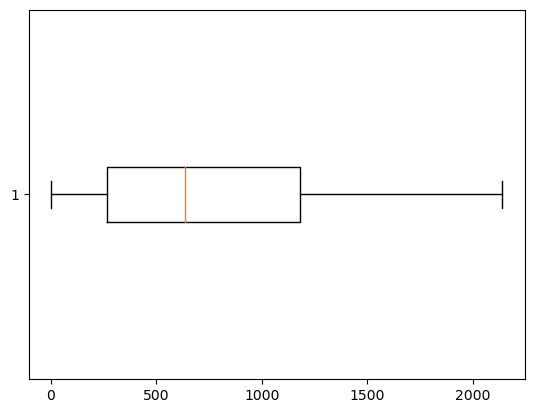

In [60]:
plt.boxplot(df_no_outliers['Rented Bike Count'], vert=False)
plt.show()

In [61]:
# to get the independent variables, simply drop the y
X = df_no_outliers.drop('Rented Bike Count', axis=1)
# to get the dependent variable only
y = df_no_outliers['Rented Bike Count']

In [62]:
# Apply Min-Max scaling to X and y together
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(pd.concat([X, y], axis=1))

# Split the scaled data into training and testing sets
X_scaled, y_scaled = data_scaled[:, :-1], data_scaled[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.10, random_state=42)

# Convert X_train, X_test, y_train, y_test back to DataFrames if needed
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# y_train = pd.DataFrame(y_train, columns=y.columns)
# y_test = pd.DataFrame(y_test, columns=y.columns)

In [63]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [64]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [65]:
# because the p-values of the following variables are greater than 0.05
# the variables are insignificant
to_drop = ['Day', 'Visibility (10m)', 'Wind speed (m/s)']
X_train_sig = X_train.drop(to_drop,axis=1)
X_test_sig = X_test.drop(to_drop,axis=1)

In [66]:
# we build model only with significant variables
model_sig_no_outliers = sm.OLS(y_train, X_train_sig)
# We fit the data model with the given data
model_sig_no_outliers = model_sig_no_outliers.fit()

In [67]:
print(model_sig_no_outliers.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:17:12   Log-Likelihood:                 1572.8
No. Observations:                5174   AIC:                            -3132.
Df Residuals:                    5167   BIC:                            -3086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [68]:
predictions_no_outliers = model_sig_no_outliers.predict(X_test_sig)

mse = mean_squared_error(predictions_no_outliers, y_test)
rmse = np.sqrt(mse)
print("RMSE is", rmse)

RMSE is 0.17955528821977407


In [69]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions_no_outliers)
print("R-squared is", r2)

R-squared is 0.5987191578149417


In [70]:
y_test.max(), predictions_no_outliers.max()

(1.0, 0.7591993128423405)

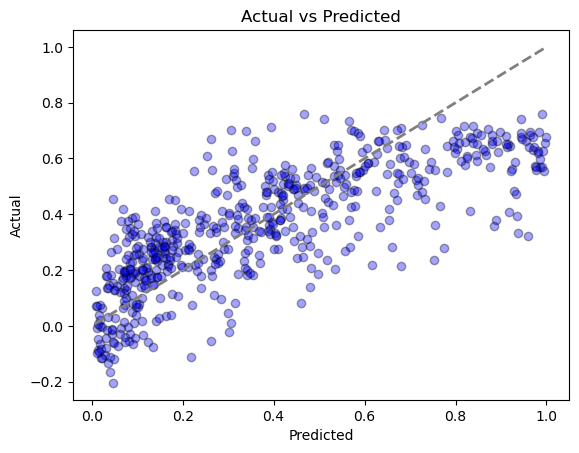

In [71]:
# plt.figure(figsize=(4,4))
plt.scatter(y_test, predictions_no_outliers, color='b', alpha=0.36, linewidth=1, edgecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

# Add a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.show()

## Linear Regression through sklearn

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=45)

R^2 is 0.5590
RMSE is 0.1795


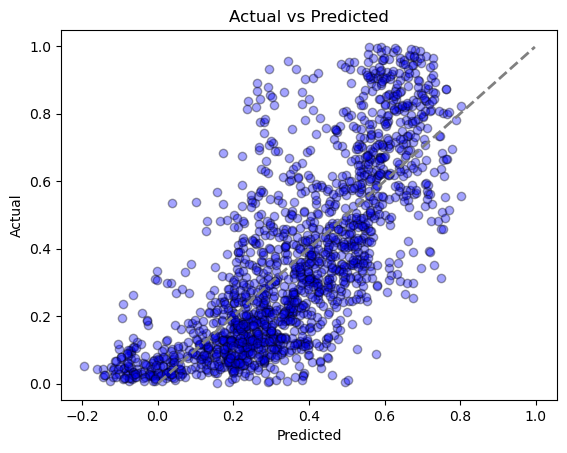

In [73]:
# Train a Linar Regressor model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_pred, y_test, color='b', alpha=0.36, linewidth=1, edgecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

# Add a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

# Calculate and display evaluation metrics
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print(f'R^2 is {r_squared:.4f}')
print(f'RMSE is {rmse:.4f}')

# Show the plot
plt.show()

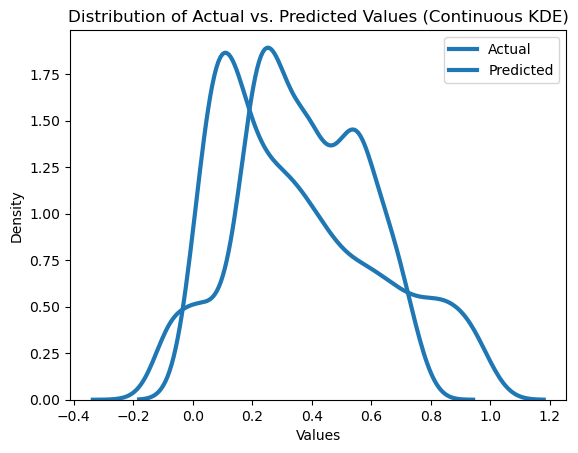

In [74]:
# Create a KDE plot for actual values (green)
sns.kdeplot(data=y_test, color='green', label='Actual', linewidth=3)

# Create a KDE plot for predicted values (red)
sns.kdeplot(data=y_pred, color='red', label='Predicted', linewidth=3)

# Set plot labels and title
plt.title('Distribution of Actual vs. Predicted Values (Continuous KDE)')
plt.xlabel('Values')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Decision Tree Regressor

R^2 is 0.7648
RMSE is 0.1311


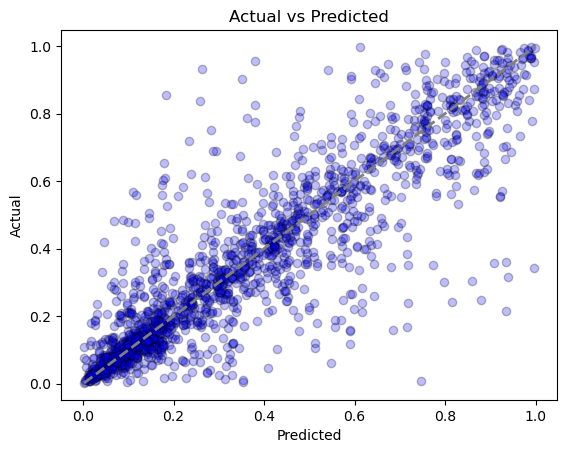

In [75]:
# Train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_pred, y_test, color='b', alpha=0.26, linewidth=1, edgecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

# Add a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

# Calculate and display evaluation metrics
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print(f'R^2 is {r_squared:.4f}')
print(f'RMSE is {rmse:.4f}')

# Show the plot
plt.show()

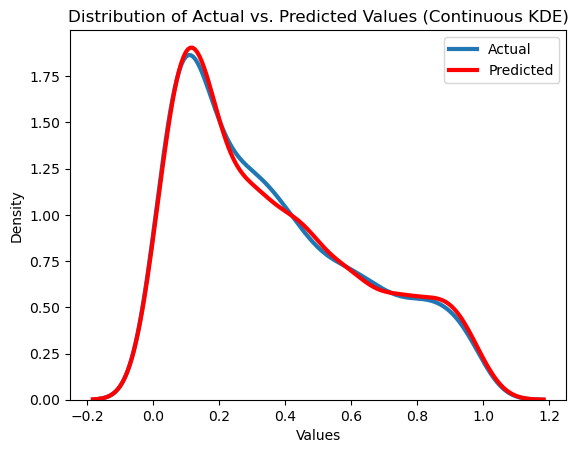

In [76]:
# Create a KDE plot for actual values (green)
sns.kdeplot(data=y_test, color='green', label='Actual', linewidth=3)

# Create a KDE plot for predicted values (red)
sns.kdeplot(data=y_pred, color='red', label='Predicted', linewidth=3)

# Set plot labels and title
plt.title('Distribution of Actual vs. Predicted Values (Continuous KDE)')
plt.xlabel('Values')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Random Forest Regressor

C:\Users\Hp\AppData\Local\Temp\ipykernel_15908\1441315394.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


R^2 is 0.8662
RMSE is 0.0989


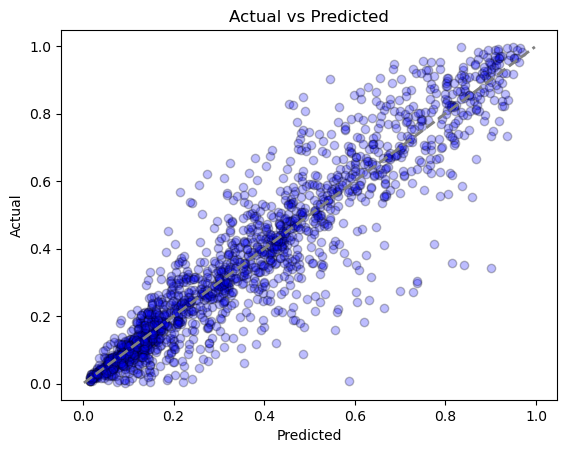

In [77]:
# Train a RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_pred, y_test, color='b', alpha=0.26, linewidth=1, edgecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

# Add a diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

# Calculate and display evaluation metrics
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print(f'R^2 is {r_squared:.4f}')
print(f'RMSE is {rmse:.4f}')

# Show the plot
plt.show()

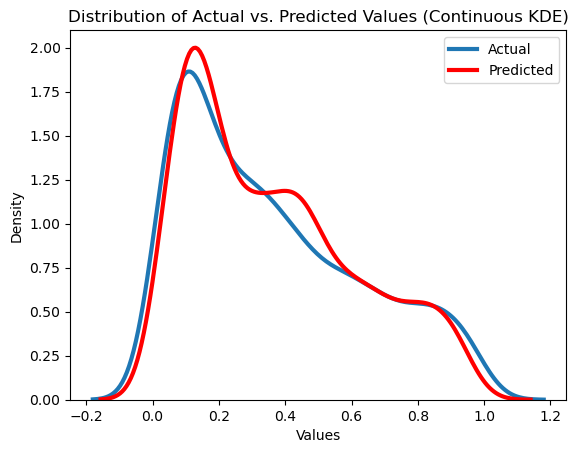

In [78]:
# Create a KDE plot for actual values (green)
sns.kdeplot(data=y_test, color='green', label='Actual', linewidth=3)

# Create a KDE plot for predicted values (red)
sns.kdeplot(data=y_pred, color='red', label='Predicted', linewidth=3)

# Set plot labels and title
plt.title('Distribution of Actual vs. Predicted Values (Continuous KDE)')
plt.xlabel('Values')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Summary

In [79]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return r_squared, rmse

# Create a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Initialize a list to store results
results = []

# Iterate through models, train, and evaluate
for model_name, model in models.items():
    r_squared, rmse = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({"Model": model_name, "R^2": r_squared, "RMSE": rmse})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the summary table of results
print(results_df)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15908\2617857438.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


                     Model       R^2      RMSE
0        Linear Regression  0.559015  0.179537
1  Decision Tree Regressor  0.760639  0.132272
2  Random Forest Regressor  0.868865  0.097904


## Conclusion

After conducting exploratory data analysis, we identified several key variables that significantly impact the number of bikes rented on a specific day. These variables include:

- **Hour:** Rental patterns vary throughout the day, with peak demand during specific hours.
- **Temperature(°C):** Warmer days lead to higher bike rentals, while colder days see fewer rentals.
- **Humidity(%):** Lower humidity levels are associated with increased bike rentals.
- **Wind Speed (m/s):** Lower wind speeds may encourage more bike rentals.
- **Visibility (10m):** Clear and good visibility conditions attract more riders.
- **Solar Radiation (MJ/m2):** Higher solar radiation levels (sunnier days) correlate with increased rentals.
- **Rainfall(mm):** Rainy days result in fewer bike rentals.
- **Snowfall (cm):** Snowy conditions significantly reduce bike rentals.
- **Day, Month, Year:** Specific dates and seasonal variations impact rental trends.

**Random Forest Regressor** emerged as the best-performing model in our analysis. It achieved an impressive R-squared (R^2) value of 0.869, indicating its ability to accurately predict bike rentals. Additionally, it exhibited the lowest Root Mean Squared Error (RMSE) of 0.097, further highlighting its predictive power.

Here is a summary of the model performance:

| Model                   | R^2     | RMSE    |
|-------------------------|---------|---------|
| Linear Regression       | 0.559   | 0.179   |
| Decision Tree Regressor | 0.761   | 0.132   |
| Random Forest Regressor | 0.869   | 0.097   |

Also, after removing outliers, we observed that the R^2 score of linear regression improved to 0.598, indicating a better fit to the data.
